In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

degree_jobs_cleaned = pd.read_csv("degree_jobs_cleaned.csv")
degree_jobs_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_id             759 non-null    int64 
 1   job_title          759 non-null    object
 2   salary_usd         759 non-null    int64 
 3   employment_type    759 non-null    object
 4   company_location   759 non-null    object
 5   is_remote          759 non-null    bool  
 6   employee_location  759 non-null    object
 7   job_skills         759 non-null    object
 8   degree_required    759 non-null    object
 9   posting_date       759 non-null    object
 10  company_name       759 non-null    object
 11  has_target         759 non-null    bool  
 12  salary_tier        759 non-null    object
 13  degree_flag        759 non-null    object
dtypes: bool(2), int64(2), object(10)
memory usage: 72.8+ KB


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

no_degree_jobs_cleaned = pd.read_csv("no_degree_jobs_cleaned.csv")
no_degree_jobs_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_id             1184 non-null   int64 
 1   job_title          1184 non-null   object
 2   salary_usd         1184 non-null   int64 
 3   employment_type    1184 non-null   object
 4   company_location   1184 non-null   object
 5   is_remote          1184 non-null   bool  
 6   employee_location  1184 non-null   object
 7   job_skills         1184 non-null   object
 8   degree_required    1184 non-null   bool  
 9   posting_date       1184 non-null   object
 10  company_name       1184 non-null   object
 11  salary_tier        1184 non-null   object
 12  has_target         1184 non-null   bool  
 13  degree_flag        1184 non-null   object
dtypes: bool(3), int64(2), object(9)
memory usage: 105.3+ KB


In [85]:
degree_jobs_cleaned['employment_type'].value_counts()

employment_type
PT    198
CT    190
FT    186
FL    185
Name: count, dtype: int64

In [86]:
no_degree_jobs_cleaned['employment_type'].value_counts()

employment_type
Full-time                   1089
Contractor                    62
Full-time and Part-time       15
Part-time                      5
Full-time and Temp work        4
Temp work                      4
Full-time and Per diem         2
Full-time and Contractor       2
Contractor and Temp work       1
Name: count, dtype: int64

In [87]:
# Map abbreviations to full strings for consistency
mapping = {
    "FT": "Full-time",
    "FL": "Full-time",  
    "PT": "Part-time",
    "CT": "Contractor"
}
degree_jobs_cleaned['employment_type'] = degree_jobs_cleaned['employment_type'].map(mapping)

In [88]:
# Simplify mixed types and collapse into a primary category for consistency
collapse_map = {
    "Full-time and Part-time": "Full-time",
    "Full-time and Temp work": "Full-time",
    "Full-time and Per diem": "Full-time",
    "Full-time and Contractor": "Full-time",
    "Contractor and Temp work": "Contractor"
}
no_degree_jobs_cleaned['employment_type'] = no_degree_jobs_cleaned['employment_type'].replace(collapse_map)

In [89]:
print(degree_jobs_cleaned['employment_type'].unique())

['Contractor' 'Part-time' 'Full-time']


In [90]:
print(no_degree_jobs_cleaned['employment_type'].unique())

['Full-time' 'Contractor' 'Part-time' 'Temp work']


In [91]:
# Unified mapping
categories = ['Full-time', 'Part-time', 'Contractor', 'Temp work']

In [92]:
print(degree_jobs_cleaned.columns)

Index(['job_id', 'job_title', 'salary_usd', 'employment_type',
       'company_location', 'is_remote', 'employee_location', 'job_skills',
       'degree_required', 'posting_date', 'company_name', 'has_target',
       'salary_tier', 'degree_flag'],
      dtype='object')


In [93]:
assert degree_jobs_cleaned['job_id'].is_unique

In [94]:
assert no_degree_jobs_cleaned['job_id'].is_unique

In [95]:
degree_jobs_cleaned['company_location'].value_counts()

company_location
France            46
Israel            46
United States     42
Netherlands       41
Finland           40
Austria           40
Denmark           39
Sweden            39
Singapore         38
India             38
United Kingdom    38
Japan             37
Norway            37
Ireland           36
Australia         36
Switzerland       35
Germany           34
China             33
South Korea       32
Canada            32
Name: count, dtype: int64

In [96]:
degree_jobs_cleaned['company_name'].value_counts()

company_name
Cloud AI Solutions            67
Predictive Systems            52
Cognitive Computing           50
DataVision Ltd                49
Algorithmic Solutions         48
Future Systems                48
Neural Networks Co            48
Quantum Computing Inc         47
TechCorp Inc                  47
Autonomous Tech               46
Advanced Robotics             44
Digital Transformation LLC    43
DeepTech Ventures             43
AI Innovations                43
Smart Analytics               42
Machine Intelligence Group    42
Name: count, dtype: int64

In [97]:
no_degree_jobs_cleaned['company_location'].value_counts()

company_location
United States           1007
Sudan                     30
United Kingdom            15
India                     13
Israel                     8
Mexico                     7
Colombia                   7
Spain                      6
Philippines                6
Singapore                  6
Poland                     4
France                     4
Hungary                    4
Portugal                   4
Greece                     4
Sweden                     3
Costa Rica                 3
Germany                    3
Taiwan                     3
Indonesia                  3
South Africa               3
Malta                      3
United Arab Emirates       2
Estonia                    2
Ireland                    2
Lithuania                  2
Netherlands                2
Italy                      2
New Zealand                2
Bulgaria                   2
Vietnam                    2
El Salvador                1
Egypt                      1
Panama                    

In [98]:
no_degree_jobs_cleaned['company_name'].value_counts()

company_name
Robert Half                                47
Get It Recruit - Information Technology    43
Insight Global                             42
Jobot                                      27
Publicis Groupe                            12
                                           ..
Ultimate Staffing                           1
Coniq                                       1
Bluesight                                   1
DC Public Library                           1
Similarweb                                  1
Name: count, Length: 800, dtype: int64

In [99]:
degree_jobs_cleaned['is_remote'].value_counts()

is_remote
True     505
False    254
Name: count, dtype: int64

In [100]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("data_analyst_jobs.db")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS degree_jobs;")
cursor.execute("DROP TABLE IF EXISTS no_degree_jobs;")
conn.commit()

In [101]:
# Create degree_jobs table
cursor.execute("""
    CREATE TABLE degree_jobs (
        job_id INTEGER PRIMARY KEY,
        job_title TEXT,
        salary_usd INTEGER,
        employment_type TEXT,
        company_location TEXT,
        is_remote INTEGER,
        employee_location TEXT,
        job_skills TEXT,
        degree_required INTEGER,
        posting_date TEXT,
        company_name TEXT,
        has_target INTEGER,
        salary_tier TEXT,
        degree_flag TEXT
    );
""")   # <-- closing parenthesis here

# Create no_degree_jobs table
cursor.execute("""            
    CREATE TABLE no_degree_jobs (
        job_id INTEGER PRIMARY KEY,
        job_title TEXT,
        salary_usd INTEGER,
        employment_type TEXT,
        company_location TEXT,
        is_remote INTEGER,
        employee_location TEXT,
        job_skills TEXT,
        degree_required INTEGER,
        posting_date TEXT,
        company_name TEXT,
        has_target INTEGER,
        salary_tier TEXT,
        degree_flag TEXT
    );
""")  

conn.commit()


In [102]:
degree_jobs_cleaned.to_sql("degree_jobs", conn, if_exists="append", index=False)

759

In [103]:
no_degree_jobs_cleaned.to_sql("no_degree_jobs", conn, if_exists="append", index=False)

1184

In [104]:
print(pd.read_sql_query("PRAGMA table_info(degree_jobs);", conn))

    cid               name     type  notnull dflt_value  pk
0     0             job_id  INTEGER        0       None   1
1     1          job_title     TEXT        0       None   0
2     2         salary_usd  INTEGER        0       None   0
3     3    employment_type     TEXT        0       None   0
4     4   company_location     TEXT        0       None   0
5     5          is_remote  INTEGER        0       None   0
6     6  employee_location     TEXT        0       None   0
7     7         job_skills     TEXT        0       None   0
8     8    degree_required  INTEGER        0       None   0
9     9       posting_date     TEXT        0       None   0
10   10       company_name     TEXT        0       None   0
11   11         has_target  INTEGER        0       None   0
12   12        salary_tier     TEXT        0       None   0
13   13        degree_flag     TEXT        0       None   0


In [105]:
print(pd.read_sql_query("PRAGMA table_info(no_degree_jobs);", conn))

    cid               name     type  notnull dflt_value  pk
0     0             job_id  INTEGER        0       None   1
1     1          job_title     TEXT        0       None   0
2     2         salary_usd  INTEGER        0       None   0
3     3    employment_type     TEXT        0       None   0
4     4   company_location     TEXT        0       None   0
5     5          is_remote  INTEGER        0       None   0
6     6  employee_location     TEXT        0       None   0
7     7         job_skills     TEXT        0       None   0
8     8    degree_required  INTEGER        0       None   0
9     9       posting_date     TEXT        0       None   0
10   10       company_name     TEXT        0       None   0
11   11         has_target  INTEGER        0       None   0
12   12        salary_tier     TEXT        0       None   0
13   13        degree_flag     TEXT        0       None   0


In [106]:
query = """
SELECT d.job_id,
       d.job_title,
       d.salary_usd AS degree_salary,
       n.salary_usd AS no_degree_salary,
       d.job_skills AS degree_skills,
       n.job_skills AS no_degree_skills
FROM degree_jobs d
JOIN no_degree_jobs n
ON d.job_id = n.job_id;
"""

joined_jobs = pd.read_sql_query(query, conn)
print(joined_jobs.head())


   job_id     job_title  degree_salary  no_degree_salary  \
0     918  Data Analyst         349508             55000   
1    1696  Data Analyst          75085            125000   
2    7117  Data Analyst         158378             50000   
3    7410  Data Analyst         176235             41446   
4   10147  Data Analyst         217159            105000   

                                       degree_skills  \
0                      ['Java', 'SQL', 'R', 'Spark']   
1  ['Deep Learning', 'Kubernetes', 'Spark', 'Scala']   
2       ['GCP', 'Kubernetes', 'Azure', 'TensorFlow']   
3              ['Scala', 'Computer Vision', 'Linux']   
4  ['Data Visualization', 'Kubernetes', 'Git', 'H...   

                                    no_degree_skills  
0  ['php', 'python', 'r', 'mysql', 'aws', 'linux'...  
1             ['sql', 'word', 'excel', 'powerpoint']  
2    ['python', 'r', 'excel', 'tableau', 'power bi']  
3  ['sql', 'sas', 'sas', 'excel', 'spss', 'sharep...  
4  ['sql', 'sql server', 'o

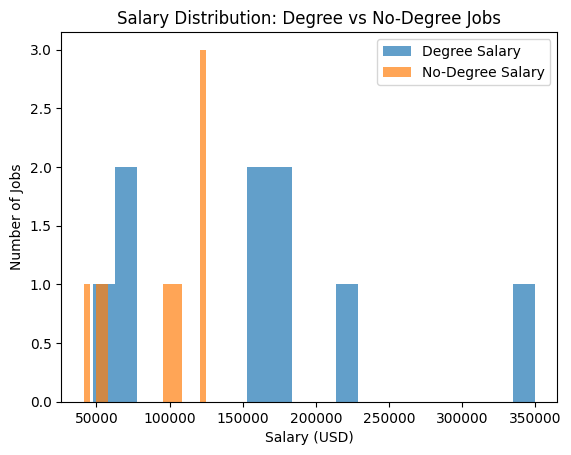

In [107]:
import matplotlib.pyplot as plt

plt.hist(joined_df["degree_salary"].dropna(), bins=20, alpha=0.7, label="Degree Salary")
plt.hist(joined_df["no_degree_salary"].dropna(), bins=20, alpha=0.7, label="No-Degree Salary")
plt.title("Salary Distribution: Degree vs No-Degree Jobs")
plt.xlabel("Salary (USD)")
plt.ylabel("Number of Jobs")
plt.legend()
plt.show()

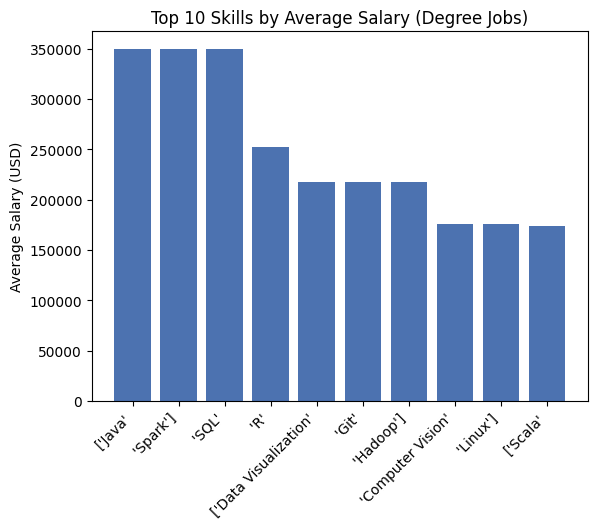

In [121]:
# Explode skills into rows
skills_df = joined_jobs.assign(degree_skills=joined_jobs["degree_skills"].str.split(",")).explode("degree_skills")
avg_salary_by_skill = skills_df.groupby("degree_skills")["degree_salary"].mean().sort_values(ascending=False).head(10)

plt.bar(avg_salary_by_skill.index, avg_salary_by_skill.values, color="#4C72B0")
plt.title("Top 10 Skills by Average Salary (Degree Jobs)")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

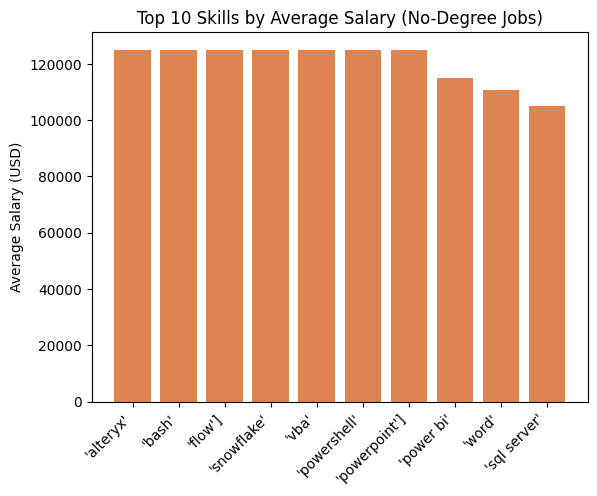

In [124]:
# Explode skills into rows for no-degree jobs
no_skills_df = joined_jobs.assign(no_degree_skills=joined_jobs["no_degree_skills"].str.split(",")).explode("no_degree_skills")
no_skills_df["no_degree_skills"] = no_skills_df["no_degree_skills"].str.strip()

# Compute average salary by skill
avg_salary_by_skill_no = (
    no_skills_df.groupby("no_degree_skills")["no_degree_salary"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.bar(avg_salary_by_skill_no.index, avg_salary_by_skill_no.values, color="#DD8452")
plt.title("Top 10 Skills by Average Salary (No-Degree Jobs)")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()
